In [1]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
data = datasets.load_boston() ## loads Boston dataset from datasets library 

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

# Simple Linear Regression - statsmodels.api

In [3]:
# Get X and Y variables
X = df["RM"] 
y = target["MEDV"] 
X = sm.add_constant(X) ## this package needs to manually add an intercept (beta_0)

In [4]:
# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [5]:
# Print out the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        15:13:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Make the prediction
predictions = model.predict(X)
# Print out the first 5 predicted values
print(predictions[:5])

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64


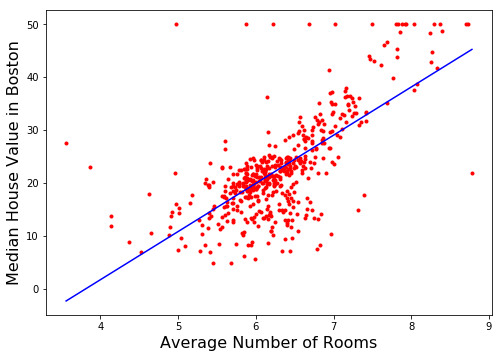

In [7]:
# Make the plot
X_p = np.array(X['RM'])
y_p = np.array(y)
x_values = np.array([X_p.max(), X_p.min()])
y_values = model.predict(sm.add_constant(x_values))

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.plot(x_values, y_values, color = 'blue')
plt.xlabel('Average Number of Rooms', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

# Simple Linear Regression - sklearn

In [8]:
# import corresponding package
from sklearn import linear_model
from sklearn import datasets ## imports datasets from scikit-learn

In [9]:
# Get X and Y variables
X = np.array(df["RM"]).reshape(-1, 1) # no need to add constant for sklearn
y = target["MEDV"]

In [10]:
# Fit Least Squares Estimate
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [11]:
# print coefficients
print(model.intercept_)
print(model.coef_[0])

-34.67062077643857
9.10210898118031


In [12]:
# Make the prediction
predictions = lm.predict(X)
print(predictions[:5])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211]


### Manually calculate t statistics, p-value, and confidence interval

In [13]:
n = len(X)
RSS = sum((y-predictions)**2) # redisual sum of squares. Also called SSE
s_sq = RSS/(n-2) # estimate of sigma squared (df=n-2)

# T statistics for beta_1
params = np.append(lm.intercept_,lm.coef_) # (beta_0, beta_1)
L_xx = sum(X**2)- n* np.mean(X)**2
t = params[1] * np.sqrt(L_xx) / np.sqrt(s_sq)

print(t)

[21.72203351]


In [14]:
# P value
from scipy import stats # we need to use scipy package for t test
p_value =2*(1-stats.t.cdf(np.abs(t),n-2))
print(p_value)

[0.]


In [15]:
# Confidence Interval for beta_1
print(params[1] + stats.t.ppf(0.975, n-2) * np.sqrt(s_sq) / np.sqrt(L_xx))
print(params[1] - stats.t.ppf(0.975, n-2) * np.sqrt(s_sq) / np.sqrt(L_xx))

[9.92536292]
[8.27885504]


# Multiple Linear Regression

In [16]:
# Get the X,y
X = df[['RM','CRIM']]
y = target["MEDV"] 
X = sm.add_constant(X) # again, this package needs to manually add an intercept (beta_0)

In [17]:
# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [18]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           5.22e-86
Time:                        15:14:10   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
RM             8.3911      0.405     20.726      0.000       7.596       9.186
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Make the prediction
predictions = model.predict(X)
# Print out the first 5 predicted values
print(predictions[:5])

0    25.924880
1    24.627095
2    31.037876
3    29.467401
4    30.707953
dtype: float64


# Adding Other Variable Forms

In [20]:
# Check all variables
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Log Terms

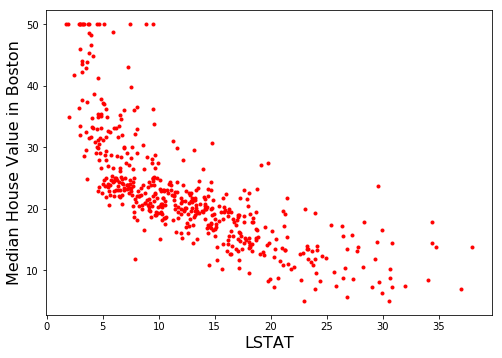

In [21]:
# Make the plot
X_p = np.array(df['LSTAT'])
y_p = np.array(y)

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.xlabel('LSTAT', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

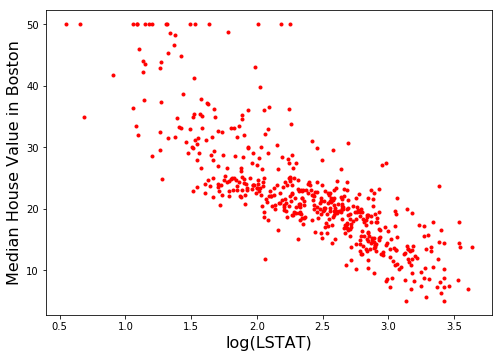

In [22]:
# Make the plot for log terms
X_p = np.array(np.log(df['LSTAT']))
y_p = np.array(y)

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

In [23]:
# Regression without log terms
X = df["LSTAT"] 
y = target["MEDV"] 
X = sm.add_constant(X) ## this package needs to manually add an intercept (beta_0)

# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

# Print out the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        15:14:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

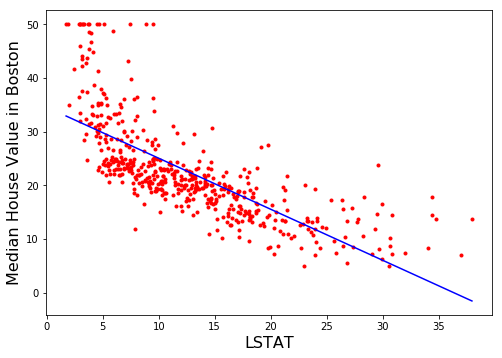

In [24]:
# Make the plot
X_p = np.array(X['LSTAT'])
y_p = np.array(y)
x_values = np.array([X_p.max(), X_p.min()])
y_values = model.predict(sm.add_constant(x_values))

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.plot(x_values, y_values, color = 'blue')
plt.xlabel('LSTAT', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

<Figure size 576x403.2 with 0 Axes>

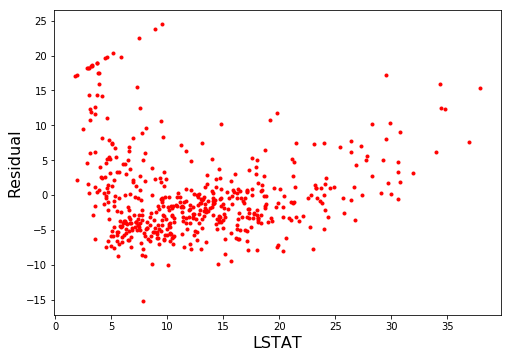

In [26]:
# Make the residual plot
X_p = np.array(X['LSTAT'])
y_p = np.array(y)
y_values = model.predict(sm.add_constant(X_p))

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p-y_values,'ro',ms=3)
plt.xlabel('LSTAT', fontsize = 16)
plt.ylabel('Residual', fontsize = 16)
plt.show()

In [27]:
## Regression without log terms
# Concatenate dataframe
df_target = pd.concat([df,target], axis=1)
df_target.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ np.log(LSTAT)', data=df_target).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          9.28e-122
Time:                        15:15:36   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

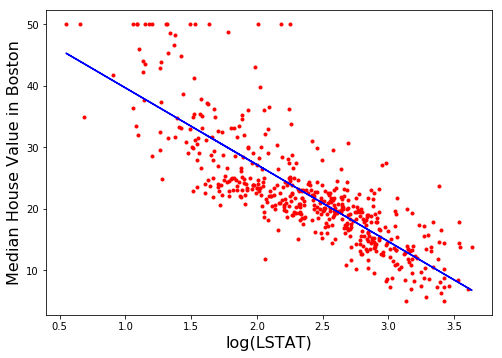

In [30]:
# Make the plot with log terms
X_p = np.array(np.log(X['LSTAT']))
y_p = np.array(y)
x_values = X_p # use all points instead of the two end points
y_values = model.predict(df_target) # need to use the dataframe for prediction

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p,'ro',ms=3)
plt.plot(x_values, np.array(y_values), color = 'blue')
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

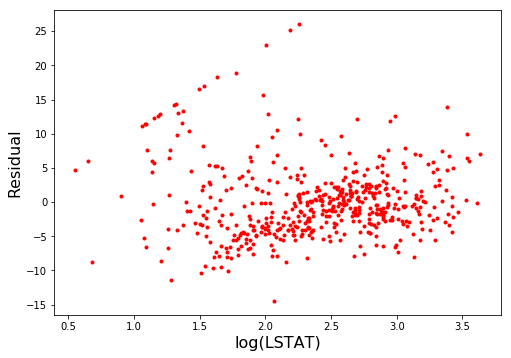

In [31]:
# Make the residual plot with log terms
X_p = np.array(np.log(X['LSTAT']))
y_p = np.array(y)
y_values = model.predict(df_target) # need to use the dataframe for prediction

plt.figure(figsize=(8,5.6))
plt.plot(X_p, y_p-np.array(y_values),'ro',ms=3)
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Residual', fontsize = 16)
plt.show()

### Categorical Variable

In [32]:
# Take a look at the CHAS variable
df.CHAS.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CHAS, dtype: float64

In [33]:
df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [34]:
# Model with both categorical variables and log terms
# Concatenate dataframe
df_target = pd.concat([df,target], axis=1)
df_target.head()
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) + np.log(LSTAT)', data=df_target).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     530.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          1.43e-124
Time:                        15:16:22   Log-Likelihood:                -1553.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     503   BIC:                             3125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         51.5250      0.956     53.899      0.000      49.647      53.403
C(CHAS)[T.1.0]     4.1819      0.918      4.554      0.000       2.378       5.986
np.log(LSTAT)    -12.3500      0.388    -31.814      0.000     -13.113     -11.587
==============================================================================
Omnibus:                      126.805   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.582
Skew:                           1.230   Prob(JB):                     1.35e-73
Kurtosis:                       6.140   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

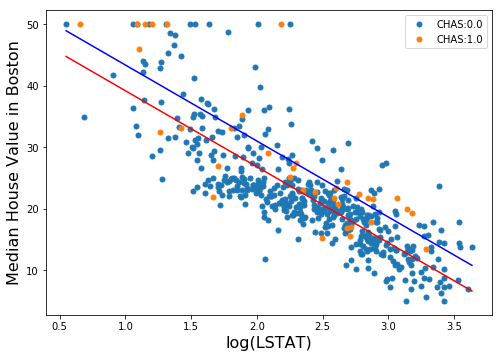

In [36]:
# Make the plot for log terms
X_p = np.array(np.log(df['LSTAT']))
y_p = np.array(y)

plt.figure(figsize=(8,5.6))
# Plot the points
groups = df_target.groupby('CHAS')
for name, group in groups:
    plt.plot(np.array(np.log(group.LSTAT)), np.array(group.MEDV), marker='o', linestyle='', ms=5, label='CHAS:'+str(name))
    y_values = model.predict(group)

# Plot the two lines
params = np.array(model.params)
x_values = np.array([X_p.max(), X_p.min()])
plt.plot(x_values, params[0]+params[2]*x_values, color = 'red') # CHAS = 0
plt.plot(x_values, params[0]+params[1]+params[2]*x_values, color = 'blue') # CHAS = 1
    
plt.legend()
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

### Interaction Terms

In [37]:
# Model with interaction
# Concatenate dataframe
df_target = pd.concat([df,target], axis=1)
df_target.head()
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) + np.log(LSTAT) + C(CHAS) :np.log(LSTAT)', data=df_target).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     354.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          1.35e-123
Time:                        15:16:25   Log-Likelihood:                -1552.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     502   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.0995      1.000     51.075      0.000      49.134      53.065
C(CHAS)[T.1.0]                   8.3909      3.090      2.715      0.007       2.320      14.462
np.log(LSTAT)                  -12.1715      0.408    -29.868      0.000     -12.972     -11.371
C(CHAS)[T.1.0]:np.log(LSTAT)    -1.8922      1.327     -1.426      0.154      -4.498       0.714
==============================================================================
Omnibus:                      128.919   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.383
Skew:                           1.239   Prob(JB):                     4.99e-77
Kurtosis:                       6.245   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Another way to model with interaction
# Concatenate dataframe
df_target = pd.concat([df,target], axis=1)
df_target.head()
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) *np.log(LSTAT)', data=df_target).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     354.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          1.35e-123
Time:                        15:16:26   Log-Likelihood:                -1552.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     502   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.0995      1.000     51.075      0.000      49.134      53.065
C(CHAS)[T.1.0]                   8.3909      3.090      2.715      0.007       2.320      14.462
np.log(LSTAT)                  -12.1715      0.408    -29.868      0.000     -12.972     -11.371
C(CHAS)[T.1.0]:np.log(LSTAT)    -1.8922      1.327     -1.426      0.154      -4.498       0.714
==============================================================================
Omnibus:                      128.919   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.383
Skew:                           1.239   Prob(JB):                     4.99e-77
Kurtosis:                       6.245   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

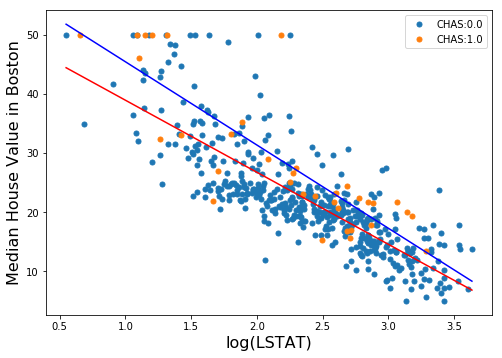

In [41]:
# Make the plot for log terms
X_p = np.array(np.log(df['LSTAT']))
y_p = np.array(y)

plt.figure(figsize=(8,5.6))
# Plot the points
groups = df_target.groupby('CHAS')
for name, group in groups:
    plt.plot(np.array(np.log(group.LSTAT)), np.array(group.MEDV), marker='o', linestyle='', ms=5, label='CHAS:'+str(name))
    y_values = model.predict(group)

# Plot the two lines
params = np.array(model.params)
x_values = np.array([X_p.max(), X_p.min()])
plt.plot(x_values, params[0]+params[2]*x_values, color = 'red') # CHAS = 0
plt.plot(x_values, params[0]+params[1]+(params[2]+params[3])*x_values, color = 'blue') # CHAS = 1
    
plt.legend()
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()